In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
pwd =  r"C:\Users\redmi\1_Data1\99_BaikalOct2024"
print(pwd)

C:\Users\redmi\1_Data1\99_BaikalOct2024


In [15]:
df = pd.read_csv(pwd+r'\origin.txt',
                sep='\t')
df['DateTime'] = pd.to_datetime(df['DateTime'], dayfirst=False)

In [36]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13750 entries, 0 to 13749
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       13750 non-null  datetime64[ns]
 1   hour           13750 non-null  float64       
 2   DateSec        13750 non-null  float64       
 3   TempAir        11659 non-null  float64       
 4   PressAir       11659 non-null  float64       
 5   Precipitation  11659 non-null  float64       
 6   LightLX        11659 non-null  float64       
 7   LightUV        11659 non-null  float64       
 8   vCO2           12383 non-null  float64       
 9   vCH4           12383 non-null  float64       
 10  vH2O           12383 non-null  float64       
 11  AirFlow        12396 non-null  float64       
 12  Channel        13750 non-null  float64       
 13  FluoNxRed      0 non-null      float64       
 14  FluoNxGrn      0 non-null      float64       
 15  FluoNxBlu      1775

In [17]:
dfm = pd.read_csv(pwd+r'/origin/meteo.txt',
                 sep='\t',
                 )
dfm['DateTime'] = pd.to_datetime(dfm['DateTime'], yearfirst=True)
dfm.drop(['date', 'time'], axis='columns', inplace=True)
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12328 entries, 0 to 12327
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  12328 non-null  int64         
 1   Temp        12328 non-null  float64       
 2   Wh          12328 non-null  float64       
 3   Wdir        12328 non-null  float64       
 4   vx          12328 non-null  float64       
 5   vy          12328 non-null  float64       
 6   vz          12328 non-null  float64       
 7   Press       12328 non-null  float64       
 8   RH          12328 non-null  float64       
 9   DateTime    12328 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 963.3 KB


In [18]:
dfc = pd.concat([df, dfm])

In [19]:
dfc = dfc.resample('1min', on='DateTime').mean()

In [20]:
dfc.reset_index(drop=False, inplace=True)
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13750 entries, 0 to 13749
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       13750 non-null  datetime64[ns]
 1   hour           13750 non-null  float64       
 2   DateSec        13750 non-null  float64       
 3   TempAir        11659 non-null  float64       
 4   PressAir       11659 non-null  float64       
 5   Precipitation  11659 non-null  float64       
 6   LightLX        11659 non-null  float64       
 7   LightUV        11659 non-null  float64       
 8   vCO2           12383 non-null  float64       
 9   vCH4           12383 non-null  float64       
 10  vH2O           12383 non-null  float64       
 11  AirFlow        12396 non-null  float64       
 12  Channel        13750 non-null  float64       
 13  FluoNxRed      0 non-null      float64       
 14  FluoNxGrn      0 non-null      float64       
 15  FluoNxBlu      1775

In [49]:
dfc['dpCO2'] = dfc['pCO2sur'] - dfc['pCO2air']
dfc['dpCH4'] = dfc['pCH4sur'] - dfc['pCH4air']
dfc['Wh10'] = dfc['Wh'] * 1.5

(-10.0, 200.0)

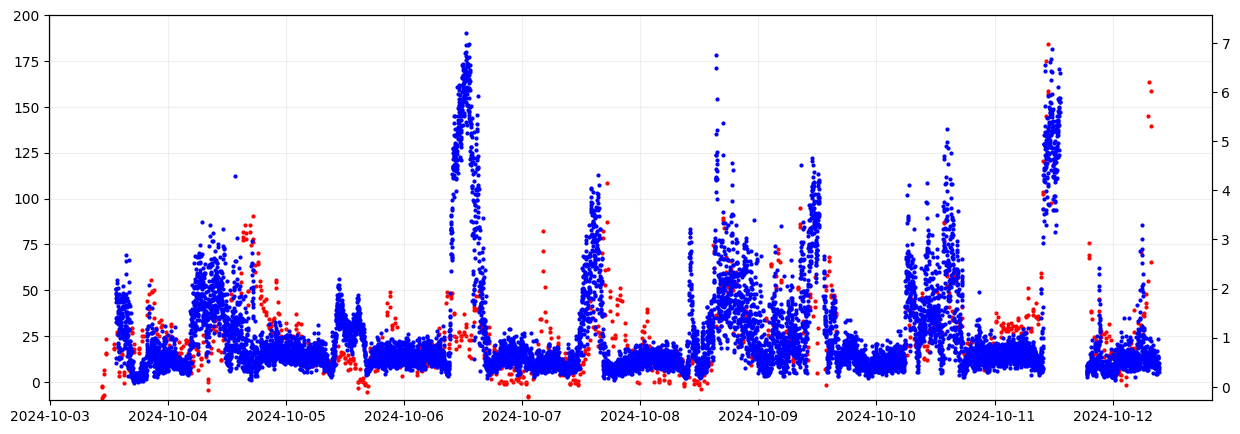

In [50]:
plt.rcParams['figure.figsize'] = [15,5]
fig, axl = plt.subplots()
axr = axl.twinx()
axl.scatter('DateTime', 'CH4flux', data=dfc, s=4, alpha=1, c='red')
axr.scatter('DateTime', 'Wh', data=dfc, s=4, alpha=1, c='blue')

axl.grid(alpha=0.2)
axl.set_ylim(-10,200)

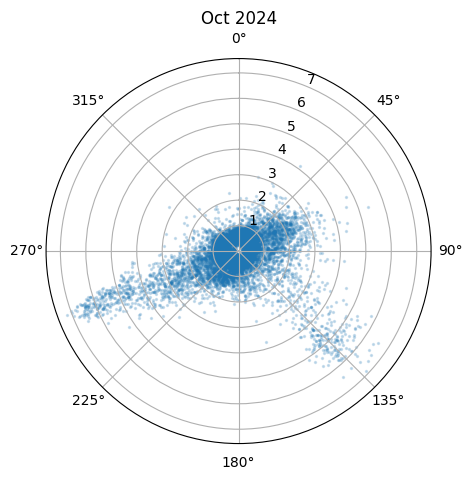

<Figure size 1500x500 with 0 Axes>

In [51]:
r = dfc['Wh']
theta = dfc['Wdir'] / 180 * np.pi
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.scatter(theta, r, s=2, alpha=0.2)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
ax.grid(True)

ax.set_title('Oct 2024')
plt.show()
plt.savefig(pwd+r'/rosewind.png')

(-10.0, 200.0)

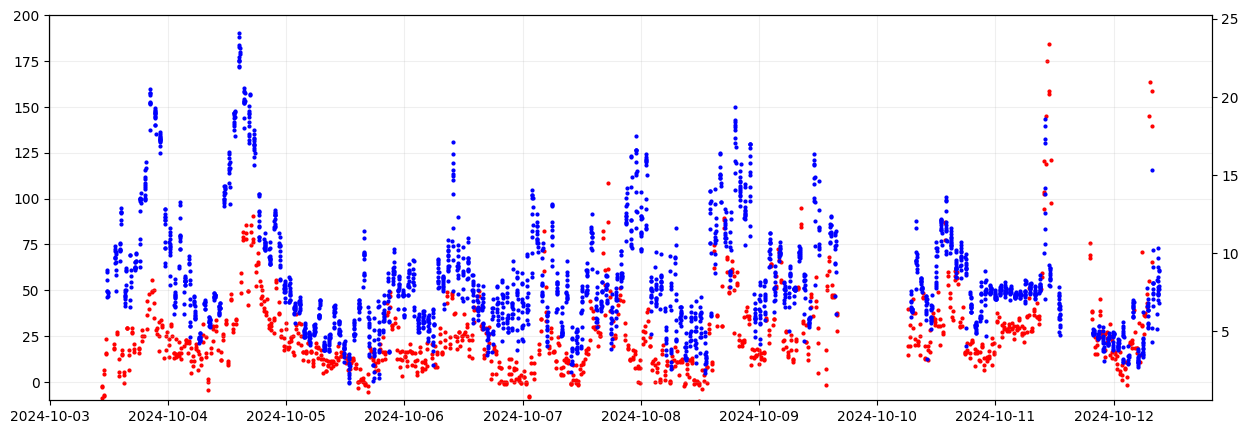

In [52]:
plt.rcParams['figure.figsize'] = [15,5]
fig, axl = plt.subplots()
axr = axl.twinx()
axl.scatter('DateTime', 'CH4flux', data=dfc, s=4, alpha=1, c='red')
axr.scatter('DateTime', 'dpCH4', data=dfc, s=4, alpha=1, c='blue')

axl.grid(alpha=0.2)
axl.set_ylim(-10,200)

(-300.0, 300.0)

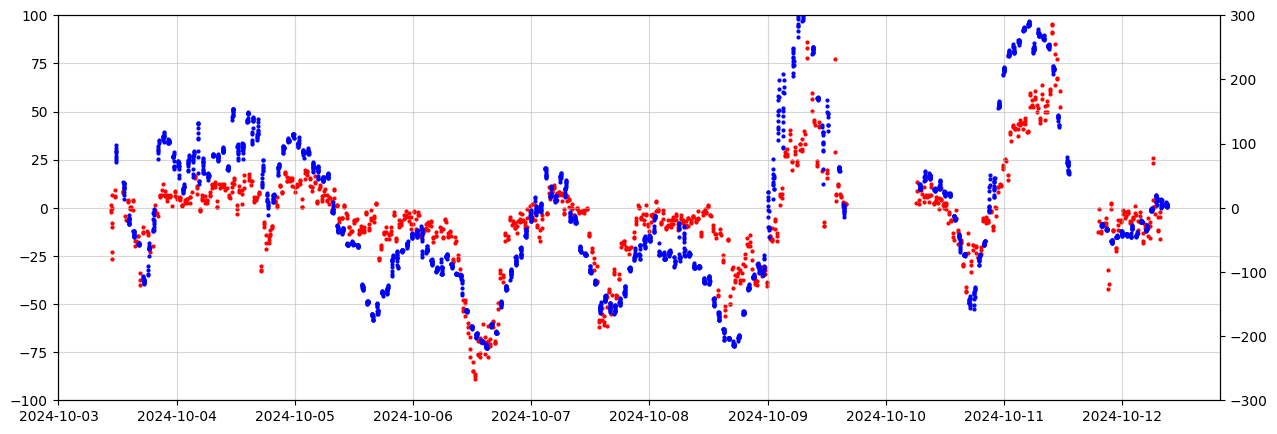

In [53]:
plt.rcParams['figure.figsize'] = [15,5]
fig, axl = plt.subplots()
axr = axl.twinx()
axl.scatter('DateTime', 'CO2flux', data=dfc, s=4, alpha=1, c='red')
axr.scatter('DateTime', 'dpCO2', data=dfc, s=4, alpha=1, c='blue')

axl.grid(alpha=0.5)
axl.set_ylim(-100, 100)
axr.set_ylim(-300, 300)

In [54]:
dfc['CO2fluxWan'] = 0.005 * dfc['dpCO2'] * np.power(dfc['Wh10'], 2)
dfc['CH4fluxWan'] = 0.064 * dfc['dpCH4'] * np.power(dfc['Wh10'], 2)

In [57]:
dfc.loc[(dfc['CO2fluxWan'] < 1000) & (dfc['Wh10'] < 100), :]

,DateTime,hour,DateSec,TempAir,PressAir,Precipitation,LightLX,LightUV,vCO2,vCH4,...,vx,vy,vz,Press,RH,dpCO2,dpCH4,Wh10,CO2fluxWan,CH4fluxWan
1024,2024-10-03 13:21:00,13.0,1.727962e+09,11.626667,0.950904,2.100000,232.835544,0.011282,451.433333,4.582000,...,0.046,-0.529,-0.104,723.6,81.3,29.453028,9.939635,0.8895,0.116518,0.503318
1025,2024-10-03 13:22:00,13.0,1.727962e+09,11.396667,0.950895,1.943333,232.835544,0.011234,445.697667,4.465000,...,0.064,-0.428,-0.033,723.6,81.6,23.809811,8.902187,0.7260,0.062748,0.300296
1026,2024-10-03 13:23:00,13.0,1.727962e+09,11.333333,0.950891,1.856667,232.835544,0.011219,441.920667,4.387667,...,0.250,-1.367,0.001,723.6,79.0,19.251880,8.621935,2.1135,0.429979,2.464843
1027,2024-10-03 13:24:00,13.0,1.727962e+09,12.523333,0.950780,1.783333,232.835544,0.010974,435.842000,4.204000,...,0.525,-1.189,0.108,723.6,77.9,13.605163,7.603252,1.9890,0.269118,1.925081
1076,2024-10-03 14:13:00,14.0,1.727965e+09,13.690000,0.950553,2.600000,232.835544,0.010965,404.421667,4.613000,...,0.854,-0.832,0.251,723.6,80.3,-20.158237,9.526959,1.8255,-0.335882,2.031880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13731,2024-10-12 09:08:00,9.0,1.728724e+09,11.336667,0.946329,1.950000,149.656312,0.007597,434.477667,3.959000,...,0.304,0.007,0.207,721.5,68.1,3.259752,7.930010,0.6285,0.006438,0.200477
13732,2024-10-12 09:09:00,9.0,1.728724e+09,12.106667,0.946259,1.943333,161.191200,0.007895,434.013333,4.030000,...,0.056,0.278,-0.127,721.5,66.7,2.824124,8.928266,0.7260,0.007443,0.301176
13733,2024-10-12 09:10:00,9.0,1.728724e+09,12.396667,0.946218,1.950000,161.191200,0.007950,435.163000,4.133667,...,0.281,0.082,0.164,721.5,64.6,3.793697,8.884937,0.6105,0.007070,0.211936
13734,2024-10-12 09:11:00,9.0,1.728724e+09,12.470000,0.946210,1.960000,161.191200,0.008131,433.609000,3.961667,...,0.148,-0.031,0.057,721.5,64.5,2.433149,6.829946,0.5115,0.003183,0.114364


(-100.0, 100.0)

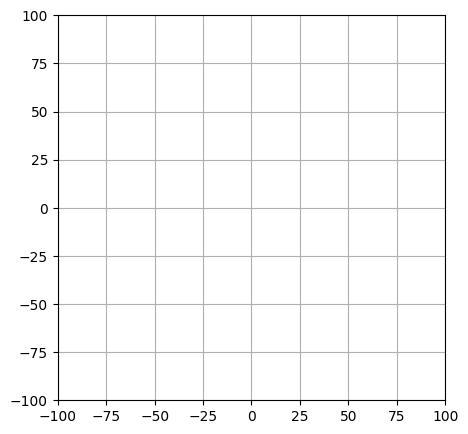

In [55]:
plt.rcParams['figure.figsize'] = [5,5]
plt.scatter('CO2flux', 'CO2fluxWan', data=dfc)
plt.grid()
plt.xlim(-100, 100)
plt.ylim(-100, 100)

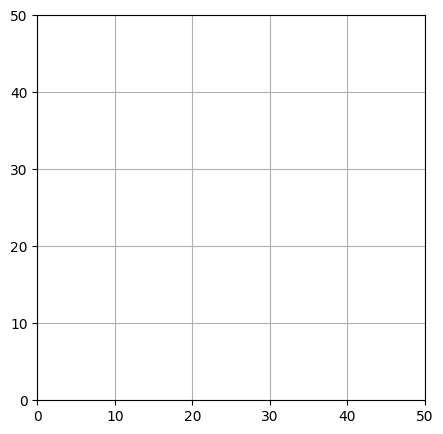

In [28]:
plt.rcParams['figure.figsize'] = [5,5]
plt.scatter('CH4flux', 'CH4fluxWan', data=dfc)
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.grid()

(-2.0, 20.0)

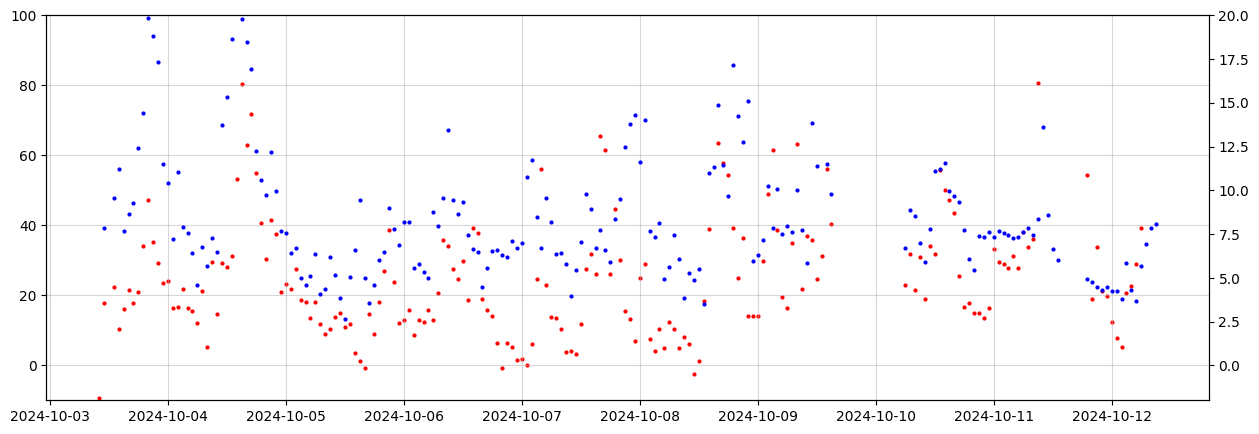

In [122]:
plt.rcParams['figure.figsize'] = [15,5]
fig, axl = plt.subplots()
axr = axl.twinx()
axl.scatter('DateTime', 'CH4flux', data=dfc, s=4, alpha=1, c='red')
axr.scatter('DateTime', 'dpCH4', data=dfc, s=4, alpha=1, c='blue')

axl.grid(alpha=0.5)
axl.set_ylim(-10, 100)
axr.set_ylim(-2, 20)

In [138]:
import os
dfc.to_csv(os.path.join(pwd, 'hourly.txt'), sep='\t')

In [139]:
os.path.join(pwd, 'hourly.txt')

'C:\\Users\\redmi\\1_Data1\\99_BaikalOct2024\\hourly.txt'